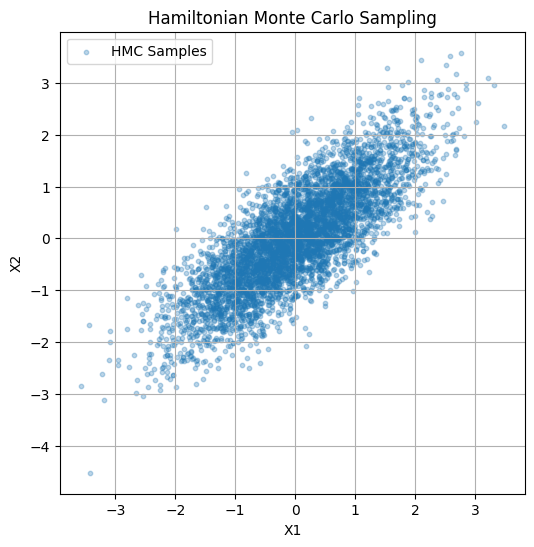

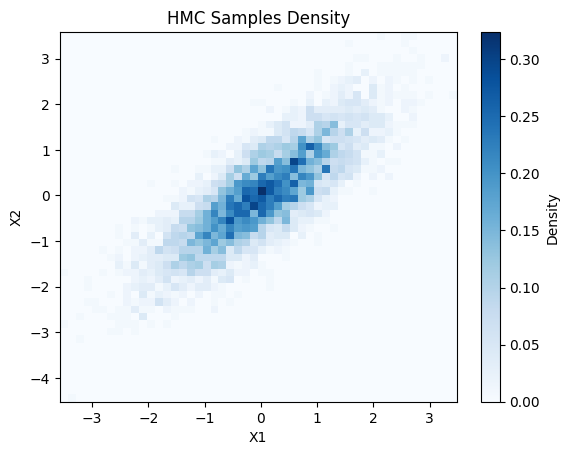

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Target distribution: 2-dimensional Gaussian distribution
mean = np.array([0, 0])  # Mean
cov = np.array([[1, 0.8], [0.8, 1.0]])  # Covariance matrix
inv_cov = np.linalg.inv(cov)  # Inverse of the covariance matrix
det_cov = np.linalg.det(cov)

def target_distribution(q):
    """Density of the target distribution (2-dimensional Gaussian)"""
    return np.exp(-0.5 * q.T @ inv_cov @ q) / (2 * np.pi * np.sqrt(det_cov))

def potential_energy(q):
    """Potential energy function U(q)"""
    return 0.5 * q.T @ inv_cov @ q

def kinetic_energy(p):
    """Kinetic energy function K(p)"""
    return 0.5 * np.dot(p, p)

def leapfrog(q, p, step_size, num_steps):
    """Simulate Hamiltonian dynamics using the leapfrog method"""
    q_new = np.copy(q)
    p_new = np.copy(p)
    
    # Half-step update for the momentum
    p_new -= 0.5 * step_size * inv_cov @ q_new

    for _ in range(num_steps):
        # Update position
        q_new += step_size * p_new
        # Update momentum (skip the half step on the last iteration)
        if _ != num_steps - 1:
            p_new -= step_size * inv_cov @ q_new

    # Final half step update for the momentum
    p_new -= 0.5 * step_size * inv_cov @ q_new

    return q_new, p_new

def hamiltonian_monte_carlo(num_samples, step_size, num_steps):
    """Hamiltonian Monte Carlo sampling"""
    samples = []
    q = np.random.randn(2)  # Initialize position

    for _ in range(num_samples):
        # Step 1: Randomly initialize momentum
        p = np.random.randn(2)

        # Step 2: Save current Hamiltonian
        current_q = np.copy(q)
        current_p = np.copy(p)
        current_H = potential_energy(current_q) + kinetic_energy(current_p)

        # Step 3: Update using leapfrog
        q, p = leapfrog(q, p, step_size, num_steps)

        # Step 4: Calculate the new Hamiltonian
        proposed_H = potential_energy(q) + kinetic_energy(p)

        # Step 5: Metropolis accept-reject step
        acceptance_prob = np.exp(current_H - proposed_H)
        if np.random.uniform(0, 1) > acceptance_prob:
            q = current_q  # Reject update

        samples.append(q)

    return np.array(samples)

# Parameter settings
num_samples = 5000
step_size = 0.1
num_steps = 20

# Run HMC
samples = hamiltonian_monte_carlo(num_samples, step_size, num_steps)

# Plot the sampling results
plt.figure(figsize=(6, 6))
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.3, s=10, label="HMC Samples")
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Hamiltonian Monte Carlo Sampling")
plt.grid(True)
plt.legend()
plt.show()

# Plot the 2D histogram of the target distribution
plt.hist2d(samples[:, 0], samples[:, 1], bins=50, density=True, cmap="Blues")
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("HMC Samples Density")
plt.colorbar(label="Density")
plt.show()
